In [6]:
%load_ext autoreload
%autoreload 2
import convert
file = "./data/nc/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200.nc"
convert.nc2gtiff(file)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
lat=nc.variables["lat"][:]
print(lat.max(),lat.min())

90.0 31.961086


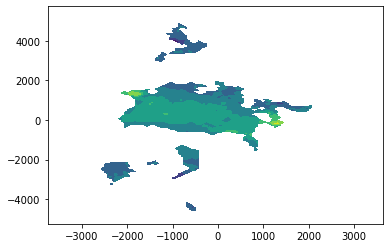

In [94]:
import matplotlib.pyplot as plt
import numpy as np
xa,ya=np.meshgrid(x,y)
plt.contourf(xa,ya,nc.variables['dX'][0])
plt.show()

In [39]:
x=nc.variables["xc"][:]
y=nc.variables["yc"]
x

masked_array(data=[-3750. , -3687.5, -3625. , -3562.5, -3500. , -3437.5,
                   -3375. , -3312.5, -3250. , -3187.5, -3125. , -3062.5,
                   -3000. , -2937.5, -2875. , -2812.5, -2750. , -2687.5,
                   -2625. , -2562.5, -2500. , -2437.5, -2375. , -2312.5,
                   -2250. , -2187.5, -2125. , -2062.5, -2000. , -1937.5,
                   -1875. , -1812.5, -1750. , -1687.5, -1625. , -1562.5,
                   -1500. , -1437.5, -1375. , -1312.5, -1250. , -1187.5,
                   -1125. , -1062.5, -1000. ,  -937.5,  -875. ,  -812.5,
                    -750. ,  -687.5,  -625. ,  -562.5,  -500. ,  -437.5,
                    -375. ,  -312.5,  -250. ,  -187.5,  -125. ,   -62.5,
                       0. ,    62.5,   125. ,   187.5,   250. ,   312.5,
                     375. ,   437.5,   500. ,   562.5,   625. ,   687.5,
                     750. ,   812.5,   875. ,   937.5,  1000. ,  1062.5,
                    1125. ,  1187.5,  1250. ,  1312

In [45]:
import xarray as xr
ds =xr.open_dataset(file)
df = ds.to_dataframe()


dict_keys([8, 9])

In [64]:
import glob
import os
sub=8
sub_name={8:"dX", 9:"dY"}

filelist=glob.glob("./data/nc/*.nc")
#print(filelist)
sub.keys()

AttributeError: 'int' object has no attribute 'keys'

In [93]:
import os
import subprocess

#variables fot roop
for sub in sub_name.keys():
    for input_name in filelist:
        out_name = "./data/tiff/{}_{}.tiff".format(os.path.basename(input_name)[:-3],sub_name[sub])
        c  ="gdal_translate -a_srs EPSG:{epsg} NETCDF:'{in_name}':{sub} -of \
        'Gtiff' '{out_name}'".format(epsg=3413,sub=sub_name[sub], in_name=in_name,out_name=out_name)
        result = os.system(c)


dX
./data/tiff/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200_dX.tiff
gdal_translate -a_srs EPSG:3413 NETCDF:'./data/nc/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200.nc':dX -of         'Gtiff' './data/tiff/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200_dX.tiff'
0
dY
./data/tiff/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200_dX.tiff
gdal_translate -a_srs EPSG:3413 NETCDF:'./data/nc/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200.nc':dY -of         'Gtiff' './data/tiff/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200_dY.tiff'
0
